# Классификация произведений писателей

In [ ]:
from google.colab import files # Для работы с файлами
import numpy as np # Для работы с данными 
import matplotlib.pyplot as plt # Для вывода графиков
import os # Для работы с файлами
%matplotlib inline

from tensorflow.keras import utils # Для работы с категориальными данными
from tensorflow.keras.models import Sequential # Полносвязная модель
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten, Activation # Слои для сети
from tensorflow.keras.preprocessing.text import Tokenizer # Методы для работы с текстами
from tensorflow.keras.preprocessing.sequence import pad_sequences # Метод для работы с последовательностями

from google.colab import drive # Для работы с Google Drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Удаляем директорию с распакованными данными (если есть)
!rm -rf /content/books

In [ ]:
!unzip -q '/content/drive/MyDrive/Colab Notebooks/Machine_learning/Datasets/books.zip' -d /content/

In [ ]:
# Функция для загрузки файла
def loadText(fileName):
  f = open(fileName, 'r') # Открываем файл в режиме чтения
  text = f.read()         # Читаем текст
  text = text.replace("\n", " ") # Заменяем переносы строк на пробелы
  text = text.replace("\r", " ") # Заменяем переносы строк на пробелы
  text = text.replace("\t", " ") # Заменяем табуляции на пробелы
  f.close()
  
  return text

labels = ["Достоевский", "Стругацкие", "Булгаков", "Саймак", "Фрай", "Тургенев"] # Наши авторы
labelsNum = len(labels) # Количество авторов

In [ ]:
# Загружаем тексты из обучающей и тренировочной выборок

trainText = [] # Обучающие тексты
testText = []  # Тестовые тексты

fileList = os.listdir('books/') # Получаем список всех файлов
for label in labels:
  for file in fileList:
    if label in file: # Проверяем, содержит ли файл j в названии имя класса i
      if 'Обучающая' in file: # Если в имени найденного класса есть строка "Обучающая" 
        trainText.append(loadText('books/' + file)) #добавляем в обучающую выборку
        print(file, 'добавлен в обучающую выборку')
      if 'Тестовая' in file: # Если в имени найденного класса есть строка "Тестовая"
        testText.append(loadText('books/' + file)) # Добавляем в обучающую выборку
        print(file, 'добавлен в тестовую выборку')

(Достоевский) - Тестовая выборка.txt добавлен в тестовую выборку
(Достоевский) - Обучающая выборка.txt добавлен в обучающую выборку
(Стругацкие) Тестовая_2 вместе.txt добавлен в тестовую выборку
(Стругацкие) Обучающая_5 вместе.txt добавлен в обучающую выборку
(Булгаков) Обучающая_5 вместе.txt добавлен в обучающую выборку
(Булгаков) Тестовая_2 вместе.txt добавлен в тестовую выборку
(Клиффорд_Саймак) Тестовая_2 вместе.txt добавлен в тестовую выборку
(Клиффорд_Саймак) Обучающая_5 вместе.txt добавлен в обучающую выборку
(Макс Фрай) Тестовая_2 вместе.txt добавлен в тестовую выборку
(Макс Фрай) Обучающая_5 вместе.txt добавлен в обучающую выборку
(Тургенев) - Обучающая выборка.txt добавлен в обучающую выборку
(Тургенев) - Тестовая выборка.txt добавлен в тестовую выборку


In [ ]:
print("Количество загруженных тренировочных текстов:", len(trainText))
print("Количество загруженных проверочных текстов:", len(testText))

Количество загруженных тренировочных текстов: 6
Количество загруженных проверочных текстов: 6


In [ ]:
# Примеры содержимого в тренировочных текстах
print(trainText[0][:100])
print(trainText[1][:100])
print(trainText[2][:100])
print(trainText[3][:100])
print(trainText[4][:100])
print(trainText[5][:100])

print("\n")

# Примеры содержимого в проверочных текстах
print(testText[0][:100])
print(testText[1][:100])
print(testText[2][:100])
print(testText[3][:100])
print(testText[4][:100])
print(testText[5][:100])

«Идиот».  Роман, в котором творческие принципы Достоевского воплощаются в полной мере, а удивительно
Парень из преисподней     1     Ну и деревня! Сроду я таких деревень не видел и не знал даже, что та
﻿Белая гвардия   Посвящается[1]  Любови Евгеньевне Белозерской[2]  <s1>Пошел мелкий снег и вдруг пов
﻿Всё живое...     Когда я выехал из нашего городишка и повернул на шоссе, позади оказался грузовик. 
﻿Власть несбывшегося   – С тех пор как меня угораздило побывать в этой грешной Черхавле, мне ежеднев
В романе «Отцы и дети» отразилась идеологическая борьба двух поколений, являвшаяся одной из главных 


Эти господа всезнайки встречаются иногда, даже довольно часто, в известном общественном слое. Они вс
﻿ОТЕЛЬ «У ПОГИБШЕГО АЛЬПИНИСТА»    ГЛАВА 1     Я остановил машину, вылез и снял черные очки. Все был
﻿Дон Кихот ДЕЙСТВУЮЩИЕ ЛИЦА Алонсо Кихано, он же Дон Кихот Ламанчский.  Антония – его племянница.  К
﻿Зачарованное паломничество    1  Гоблин со стропил следил за прячущимся монахом, который

Токенизируем тексты

In [ ]:
numWords = 20000 # Количество слов/индексов, которое мы будем учитывать при обучении

# Tokenizer - встроенная в Keras функция для разбиения текста и превращения
# в слов в числовые значения с учётом частотности

# num_words - максимальное количество слов/индексов, учитываемое при составлении словаря
# filters - список ненужных символов, которые будут удалены из текстов
# lower - приведение слов к нижнему регистру
# split - разделитель между словами
# oov_token - на какое слово будем заменять слова, которые выше по частоте, чем numWords
# char_level - просим токенайзер не удалять однобуквенные слова

tokenizer = Tokenizer(num_words=numWords,
                      filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff',
                      lower=True,
                      split=' ',
                      oov_token='unknown',
                      char_level=False)

tokenizer.fit_on_texts(trainText) # Cоберем словарь частотности
items = list(tokenizer.word_index.items()) # Получаем индексы слов

In [ ]:
print("Самые часто встречающиеся слова:")
print(items[:10]) # Самые часто встречающиеся слова
print()
print("Самые редко встречающиеся слова:")
print(items[-10:])
print()
print("Размер словаря:", len(items))

Самые часто встречающиеся слова:
[('unknown', 1), ('и', 2), ('в', 3), ('не', 4), ('я', 5), ('что', 6), ('на', 7), ('с', 8), ('он', 9), ('а', 10)]

Самые редко встречающиеся слова:
[('322322', 146754), ('323323', 146755), ('324324', 146756), ('325325', 146757), ('изменник', 146758), ('326326', 146759), ('матросскую', 146760), ('модную', 146761), ('327327', 146762), ('дерзай', 146763)]

Размер словаря: 146763


In [ ]:
# Тестирование словаря
inputWord = input("Введите слово: ")
print("Индекс слова", inputWord, ":", tokenizer.word_index[inputWord])

Введите слово: я
Индекс слова я : 5


In [ ]:
# Преобразовываем текст в последовательность индексов согласно частотному словарю
trainWordIndexes = tokenizer.texts_to_sequences(trainText)
testWordIndexes = tokenizer.texts_to_sequences(testText)

In [ ]:
# Проверим преобразование
print("Фрагмент обучающего текста:")
print("В виде оригинального текста:              ", trainText[3][:87])
print("Он же в виде последовательности индексов: ", trainWordIndexes[3][:20], '\n')

Фрагмент обучающего текста:
В виде оригинального текста:               ﻿Всё живое...     Когда я выехал из нашего городишка и повернул на шоссе, позади оказал
Он же в виде последовательности индексов:  [119, 3732, 49, 5, 8178, 26, 496, 1, 2, 2135, 7, 1169, 1324, 749, 2786, 8168, 4160, 1, 8, 1] 



In [ ]:
print("Статистика по обучающим текстам:")

symbolsTrainText = 0 # Объявляем переменную для подсчета символов в обучающих текстах
wordsTrainText = 0 # Объявляем переменную для подсчета слов в обучающих текстах

for i in range(labelsNum): # Проходим по всем классам
  print(labels[i], " "*(10-len(labels[i])), len(trainText[i]), "символов, ", len(trainWordIndexes[i]), "слов")
  symbolsTrainText += len(trainText[i]) # Считаем символы
  wordsTrainText += len(trainWordIndexes[i]) # Считаем слова 

print('----')
print("В сумме ", symbolsTrainText, " символов, ", wordsTrainText, " слов \n")
print()
print("Статистика по тестовым текстам:")

symbolsTestText = 0 # Объявляем переменную для подсчета символов в тестовых текстах
wordsTestText = 0 # Объявляем переменную для подсчета слов в тестовых текстах

for i in range(labelsNum): # Проходим по всем классам
  print(labels[i], ' '*(10-len(labels[i])), len(testText[i]), "символов, ", len(testWordIndexes[i]), "слов")
  symbolsTestText += len(testText[i]) # Считаем символы
  wordsTestText += len(testWordIndexes[i]) # Считаем слова 
print('----')
print("В сумме ", symbolsTestText, " символов, ", wordsTestText, " слов")

Статистика по обучающим текстам:
Достоевский  2171809 символов,  347667 слов
Стругацкие  2042469 символов,  313012 слов
Булгаков    1765632 символов,  261460 слов
Саймак      1609507 символов,  251502 слов
Фрай        3700010 символов,  568533 слов
Тургенев    3236768 символов,  504484 слов
----
В сумме  14526195  символов,  2246658  слов 


Статистика по тестовым текстам:
Достоевский  223527 символов,  36410 слов
Стругацкие  704846 символов,  108621 слов
Булгаков    875042 символов,  132730 слов
Саймак      318811 символов,  50360 слов
Фрай        1278191 символов,  196731 слов
Тургенев    213142 символов,  33503 слов
----
В сумме  3613559  символов,  558355  слов


Создаем xTrain и yTrain

In [ ]:
# Формирование обучающей выборки по листу индексов слов
# путем разделения на короткие векторы
# wordIndexes - массив индексов
# xLen - размер окна
# step - шаг окна
def getSetFromIndexes(wordIndexes, xLen, step):
  xText = []
  wordsLen = len(wordIndexes) # Считаем количество слов
  index = 0 # Задаем начальный индекс 

  while (index + xLen <= wordsLen): # Идём по всей длине вектора индексов
    xText.append(wordIndexes[index:index+xLen]) # "Откусываем" векторы длины xLen
    index += step # Смещаеммся вперёд на step
    
  return xText


# Формирование обучающей и проверочной выборки для каждого класса
# wordIndexes - массив индексов
# xLen - размер окна
# step - шаг окна

def createSetsMultiClasses(wordIndexes, xLen, step): # Функция принимает последовательность индексов, размер окна, шаг окна
  nClasses = len(wordIndexes) # Количество классов
  classesXSamples = []        # Здесь будет список размером "кол-во классов*кол-во окон в тексте*длину окна (например, 6 по 1341*1000)"
  for wI in wordIndexes:      # Для каждого текста выборки из последовательности индексов
    classesXSamples.append(getSetFromIndexes(wI, xLen, step))

  # Формируем один общий xSamples
  xSamples = []
  ySamples = []
  
  for t in range(nClasses):
    xT = classesXSamples[t]
    for i in range(len(xT)): # Перебираем каждое окно определенного класса
      xSamples.append(xT[i]) # Добавляем в общий список выборки
      ySamples.append(utils.to_categorical(t, nClasses)) # Добавляем соответствующий вектор класса

  xSamples = np.array(xSamples)
  ySamples = np.array(ySamples)

  
  return (xSamples, ySamples)

In [ ]:
# Задаём базовые параметры
xLen = 500 # Размер окна (количество слов в векторе)
step = 60 # Шаг разбиения текста на векторы

In [ ]:
# Формируем обучающую и тестовую выборку
xTrainId, yTrain = createSetsMultiClasses(trainWordIndexes, xLen, step)
xTestId, yTest = createSetsMultiClasses(testWordIndexes, xLen, xLen)
print("Размерности тренировочного набора")
print(xTrainId.shape)
print(yTrain.shape)
print()
print("Размерности тестового набора")
print(xTestId.shape)
print(yTest.shape)

Размерности тренировочного набора
(37398, 500)
(37398, 6)

Размерности тестового набора
(1114, 500)
(1114, 6)


In [ ]:
print(xTrainId[0])

[ 3177  2002     3   557     1 11626     1     1     3  1893   348    10
  3230 11031 18450     1     1     1 18451     2   125  4608     1  1011
  4228   517     1     1 18452  2494     2     1  2191  2368   176    77
     1     2     1     7  1950     2    95     1  7596   856  1894  5610
     3   443  6409     3     1   531     3  3480   714  4931     1     1
  5447   882     7   135     1  5448    19     1    30    20     1     2
 11032     6  8163 18453     3  2120  1510  3881     2  4709    32   882
   562    30  2495   159     6    84    26  3125 11627    26     1   107
     2     1    26    24  4509    14   156   107     1     1    58  1934
 10023     2   119     1  9590     2 18454     4    26    51     1    16
    11  3178 12974    17   135     1    24   351   114    16     1    16
   350   107  2552  3675    71  2318  4046     3   629    26     1  1934
 10023     8  6598  9591   267   479   554    17   224   636   166     1
   506   180  1860   506   125     1   506     4 15

*Здесь RAM начинает быстро расходоваться*

In [ ]:
# Преобразовываем массив векторов в Bag of Words
xTrain = tokenizer.sequences_to_matrix(xTrainId.tolist())
xTest  = tokenizer.sequences_to_matrix(xTestId.tolist())

print("Размерность обучайющей выборки")
print(xTrain.shape)
print(xTrain[0][0:100]) # Фрагмент набора слов в виде Bag of Words

print()

print("Размерность тестовой выборки")
print(xTest.shape)
print(xTest[0][0:100]) # Фрагмент набора слов в виде Bag of Words


Размерность обучайющей выборки
(37398, 20000)
[0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.
 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0.
 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1.
 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1.
 0. 0. 0. 0.]

Размерность тестовой выборки
(1114, 20000)
[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0.
 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0.
 0. 0. 0. 1.]


Нейросеть для классификации текстов на базе Bag Of Words

In [ ]:
# Создаём полносвязную сеть
model = Sequential()
model.add(Dense(512, input_dim=20000, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(6, activation='softmax'))

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               10240512  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 6)                 3078      
                                                                 
Total params: 10,243,590
Trainable params: 10,243,590
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Обучаем сеть
history = model.fit(xTrain, 
                    yTrain, 
                    epochs=1,
                    batch_size=64,
                    validation_split=0.2)

468/468 [==============================] - 9s 15ms/step - loss: 0.0294 - accuracy: 0.9914 - val_loss: 1.1130 - val_accuracy: 0.5338


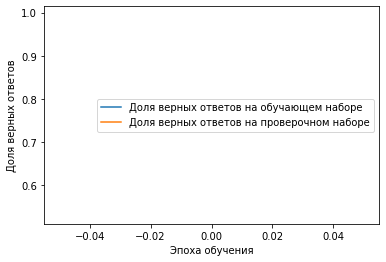

In [ ]:
# Результаты обучения
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Проверяем работу обученной нейросети

In [ ]:
# Проверяем точность на тестовой выборке

rightAnswer = [0,0,0,0,0,0]
totalAnswer = [0,0,0,0,0,0]

# Получаем результаты распознавания для каждого класса
currPred = model.predict(xTest)
# Определяем номер распознанного класса для каждохо вектора
currOut = np.argmax(currPred, axis=1)
# Определяем правильный класс для каждого вектора
yOut = np.argmax(yTest, axis=1)

print(currPred.shape)
print(currOut.shape)
print(yOut.shape)
print()


# Считаем сколько ответов всего и сколько из них правильных
for i in range(len(yOut)):
  predictA = currOut[i]
  rightA   = yOut[i]

  totalAnswer[rightA] += 1
  if predictA == rightA:
    rightAnswer[rightA] += 1

# Подсчитываем точность классификации
print("Точность распознавания текстов писателей")
for i in range(labelsNum):
  print("{:12s}: {:3d} из {:3d} - {:3.2f}%".format(labels[i], rightAnswer[i], totalAnswer[i], (rightAnswer[i]/totalAnswer[i]*100)))

(1114, 6)
(1114,)
(1114,)

Точность распознавания текстов писателей
Достоевский :  72 из  72 - 100.00%
Стругацкие  : 180 из 217 - 82.95%
Булгаков    : 202 из 265 - 76.23%
Саймак      :  79 из 100 - 79.00%
Фрай        : 366 из 393 - 93.13%
Тургенев    :  37 из  67 - 55.22%
